<a href="https://colab.research.google.com/github/premkirpal/Lecture-notes/blob/main/Copy_of_Exercise_19_Damped_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Your name here__
<br>
Date: Mar. 2, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 19: Damped pendulum</font></center>

## <font color=#46769B>Introduction</font>

Numerical methods for solving IVPs can be divided into explicit vs implicit methods. Consider a single first-order ODE

$$y'(t) = f(t,y) \, .$$

For explicit methods, it is straightforward to compute the next step $y_{i+1}$ given the previous step $y_i$. For example, in the forward Euler method, this is

$$y_{i+1} = y_i + h \, f(t_i,y_i) \, ,$$

where the right-hand side only depends on the previous step. For implicit methods, it is less straightforward. For example, in the backward Euler method, we have

$$y_{i+1} = y_i + h \, f(t_{i+1},y_{i+1}) \, .$$

Since the right-hand side now depends on $y_{i+1}$, we need to solve this algebraic equation to determine the next step $y_{i+1}$ given the previous one $y_i$. Since only for the simplest function $f(t,y)$ can $y_{i+1}$ be solved for analytically, typically one must resort to numerical algorithms to solve for $y_{i+1}$ *at each step*. 

So what is point of implicit methods? Compared to explicit methods, implicit methods can be better behaved for larger step-sizes $h$ where explicit algorithms can blow-up. The situation arises for certain types of ODEs known as __stiff ODEs__. 

__Stiffness__ is characteristic of having different time scales in the problem. (For definiteness, we'll consider the variable $t$ as time.) Coupled ODEs can involve varying time scales: some evolution can occur on short time scales, some on long time scales. For explicit methods, the step-size cannot be much larger than the *smallest* time scale in the problem. Even if we are only interested in dynamics over longer time scales, we still need our algorithm to resolve down to the smallest time scales. Implicit methods, in contrast, are better behaved, giving reasonable results even if $h$ is larger than the smallest time-scales.

The goals of this exercise are:
- Gain experience with implicit vs explicit methods and stiff systems

Required reading:
- *Lesson 9: Euler method*


## <font color=#46769B>Exercise</font>

We consider a __damped pendulum__, governed by the second-order ODE

$$\theta''(t) + \gamma \theta'(t) + \omega^2 \sin \theta(t) = 0 \, , \qquad (1)$$

where $\omega$ is the angular frequency and $\theta(t)$ is the displacement angle (with respect to the vertical axis) as a function of time $t$.
The term proportional to $\gamma$ represents a damping force, e.g., the pendulum is submerged in water, and $\gamma$ is the damping constant. The effect of [damping](https://en.wikipedia.org/wiki/Damping) is that oscillatory motion will decay away and the pendulum will approach its equilibrium configuration. 

### <font color=#46769B>Part (a)</font>

Here we consider a pendulum in the small-angle limit, $|\theta(t)| \ll 1$. In this case, we replace Eq. (1) with

$$\theta''(t) + \gamma \theta'(t) + \omega^2 \theta(t) = 0 \, ,$$

which is simply a damped harmonic oscillator. Take $\omega = 2\pi$ and $\gamma=100$. Since $\gamma \gg \omega$, this is an overdamped system. 
That is, the pendulum slowly decays to its equilibrium position without oscillations. (In fact, the damping is so large that the system moves very slowly.) 

Perform the following tasks:
- Write a code to perform the *forward* Euler method for solving for $\theta(t)$ as a function of $t$, for $t$ in the range $[0,20]$, subject to the boundary conditions $\theta(0) = 0.1$ and $\theta'(0) = 0$. Choose $N=1000$ steps in $t$.
- Write a code to perform the *backward* Euler method for the same problem. Note to solve for $y_{i+1}$ given $y_i$, you will have to invert a $2\times 2$ matrix as in the Lesson 9 notes.
- There is an approximate analytic result
$$ \theta_{\rm approx}(t) = \theta_0 e^{-\omega^2 t/\gamma} $$
that is valid in the limit $\gamma \gg \omega$.
- Make a plot showing your results for $\theta(t)$ for the forward and backward Euler methods, as well as this approximate analytic solution, $\theta_{\rm approx}(t)$. Use `plt.yscale('log')` to make a log scale on the vertical axis.


[[ 1.02000000e-01 -1.78956835e-01]
 [ 9.84208633e-02  9.84208633e-02]
 [ 1.00389281e-01 -1.76130862e-01]
 ...
 [ 3.55220391e-05  3.55220391e-05]
 [ 3.62324799e-05 -6.35691170e-05]
 [ 3.49610976e-05  3.49610976e-05]]


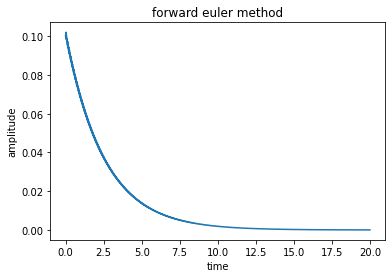

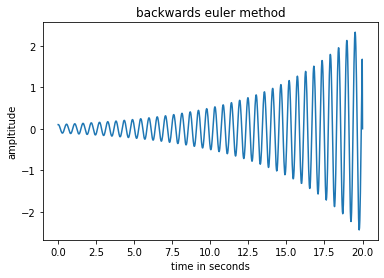

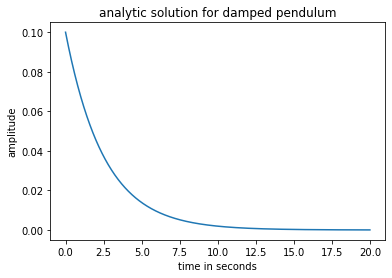

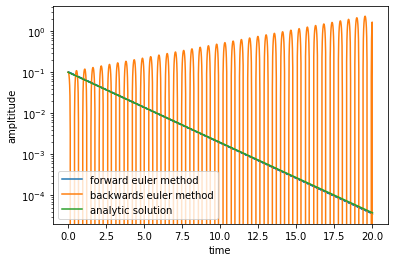

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
### CODE SUBSTITUTES THETA FOR Y FOR SIMPLICITY  ######
omega = 2*np.pi
y0=0.1
gamma = 100

def f(t,y):
  y1,y2=y
  return np.array([y2,-omega**2*y1-gamma*y2])

### TIME STEP SIZE AND NUMBER OF POINTS FOR t #####
t0=0
tf=20
N=1000
t=np.linspace(t0,tf,N+1)
h=t[1]-t[0]


#### WHERE RESULTS WILL BE STORED 'y' ######

y=np.zeros((N+1,2))
y[0]=y0
for i in range(N):
  ti=t[i]
  yi=y[i]
  y[i+1]=yi + h*f(ti,yi)
print(y[1:])

#### PLOT OF FORWARD EULER METHOD ######
### FOR INFORMATIVE PURPOSES ####
plt.plot(t,y[:,0])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('forward euler method')
plt.show()

##### BACKWARDS EULER METHOD#########

X=np.zeros((N+1,2))
X[0]=y0

A=np.array([[1,h],[-h*(omega**2+gamma),1]])/(1-(h**2*(omega**2-gamma)))
for i in range(N-1):
  ti=t[i]
  Xi=X[i]
  X[i+1]=A @ Xi

### BACKARDS EULER METHOD PLOT #####
### FOR INFORMATIVE PURPOSES ##### 

plt.figure(2)
plt.plot(t,X[:,0],label='backwards euler method')
plt.xlabel('time in seconds')
plt.ylabel('ampltitude')
plt.title('backwards euler method')
plt.show()

### ANALYTIC SOLUTION PLOT 

def theta(t):
  return 0.1*np.exp(-omega**2*t/gamma)
plt.figure(3)
plt.plot(t,theta(t))
plt.xlabel('time in seconds')
plt.ylabel('amplitude')
plt.title('analytic solution for damped pendulum')

### COMPARATIVE PLOT #### 
plt.figure(4)
plt.plot(t,y[:,0],label='forward euler method')
plt.plot(t,X[:,0],label='backwards euler method')
plt.plot(t,theta(t),label='analytic solution')
plt.yscale('log')
plt.ylabel('ampltitude')
plt.xlabel('time')
plt.legend()
plt.show()

### <font color=#46769B>Part (b)</font>

The setup in Part (a) is a stiff system. The smallest intrinsic time scale in the problem is $\gamma^{-1} = 0.01$. However, as the analytic approximation makes clear, the pendulum is evolving on a time scale $(\omega^2/\gamma)^{-1} \approx 2.5$. Taking $N=1000$ steps in part (a) corresponded to $h=0.02$, which you should have found gave reasonable solutions for both forward and backward methods.

Following upon Part (a), perform the following tasks:
- Make plots showing results for $\theta(t)$ the *forward Euler method* for $N=10$, $N=100$, and $N=900$ steps. (You may wish to plot each separately.)
- Make a plot showing with the corresponding results for the *backward Euler method*. (Plot them all together. Use a log scale for the $y$ axis.)



In [ ]:
# Your code here

## <font color=#46769B>Back to the general pendulum</font>

Let's return to Eq. (1) to consider the general equation for a damped pendulum.

$$\theta''(t) + \gamma \theta'(t) + \omega^2 \sin\theta(t) = 0 \, .$$

Here we will consider the backward Euler method for this ODE. The situation is more complicated because the system of algebraic equations we need to solve at each step cannot be done analytically. Therefore, at each step, we have to solve a system of equations numerically to figure out $y_{i+1}$ from $y_i$. This is the more realistic situation one encounters for implicit methods, so it is worthwhile to see how this works.

Eq. (1), written as a system of first-order ODEs, is

$$\mathbf{y}'(t) = \left( \begin{array}{c} y'_1(t) \\ y'_2(t) \end{array} \right) = \mathbf{f}(t,\mathbf y) = \left( \begin{array}{c} y_2(t) \\ -\omega^2 y_1(t) - \gamma y_2(t) \end{array} \right) \, .$$

So, the system of equations we need to solve is

$$\mathbf{y}_{i+1} = \mathbf{y}_{i} + h \mathbf{f}(t,\mathbf y_{i+1})$$

We are now going to learn how to use a built-in function `scipy.optimize.fsolve` to solve this equation numerically. (Documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).)
The first step is to define a function

$$ \mathbf{F}(\mathbf y_{i+1}) = \mathbf{y}_{i+1} - \mathbf{y}_{i} - h \mathbf{f}(t,\mathbf y_{i+1}) \, .$$

That is, we want to find where $\mathbf{F}(\mathbf y_{i+1}) = 0$. 

Next, we use the syntax `fsolve(F,yi)`:
- The first argument `F` is the function we want to solve for where it is zero.
- The second argument `yi` is the initial guess for where it is zero. We will take the *previous* value $\mathbf{y}_i$ as our guess.
- `fsolve(F,yi)` will return the solution, which is $\mathbf{y}_{i+1}$.

So, let's see what all this would look like in your code. First, you need to import `fsolve` at the top of your code:
```py
from scipy.optimize import fsolve
```

Next, here is the code for iterating through your steps and updating $\mathbf{y}_{i+1}$ from $\mathbf{y}_i$:
```py

for i in range(num_steps):

    yi = y[i]
    ti = t[i]
    
    def F(y_new):
        return y_new - yi - f(t,y_new)
    
    y[i+1] = fsolve(F,yi)    
    
```

### <font color=#46769B>Part (c)</font>

Using the backward Euler method, solve for $\theta(t)$ for the damped pendulum, given the boundary condition $\theta(0) = 3$ and $\theta'(0) = 0$, over the time interval $[0,20]$, with $N=1000$ steps. Take $\omega = 2\pi$ and $\gamma=100$ as in Part (a). Make a plot, with a log scale in the $y$ axis, showing:
- Your result for $\theta(t)$. 
- $\theta(t)$ from using `scipy.integrate.solve_ivp`.

In [ ]:
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

# Your code here